# Question 2

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

def f1(x,u1,u2):
    return u2

def f2(x,u1,u2):
    return (-4*u2 - 5*u1)

def function(x):
    z=3*math.exp(-2*x)*math.cos(x) + math.exp(-2*x)*math.sin(x)
    return z

def function_derivative(x):
    z=3*(-2*math.exp(-2*x)*math.cos(x) - math.sin(x)*math.exp(-2*x))
    f=-2*math.exp(-2*x)*math.sin(x) + math.exp(-2*x)*math.cos(x)
    return z+f

h=0.1
x=np.zeros(51)
y=np.zeros(51)
y_b=np.zeros(51)
u1=np.zeros(51)
u2=np.zeros(51)

x[0]=0
y[0]=3
y_b[0]=-5
u1[0]=3
u2[0]=-5

#using RK4 method
for i in range(0,50):
    K1_1=h*f1(i*h,u1[i],u2[i])
    K1_2=h*f2(i*h,u1[i],u2[i])
    K2_1=h*f1(i*h + 0.5*h, u1[i]+ 0.5*K1_1, u2[i] + 0.5*K1_2)
    K2_2=h*f2(i*h + 0.5*h, u1[i]+ 0.5*K1_1, u2[i] + 0.5*K1_2)
    K3_1=h*f1(i*h + 0.5*h, u1[i]+ 0.5*K2_1, u2[i] + 0.5*K2_2)
    K3_2=h*f2(i*h + 0.5*h, u1[i]+ 0.5*K2_1, u2[i] + 0.5*K2_2)
    K4_1=h*f1((i+1)*h,u1[i]+ K3_1,u2[i]+ K3_2)
    K4_2=h*f2((i+1)*h,u1[i]+ K3_1,u2[i]+ K3_2)
    u1[i+1]= u1[i] + (K1_1 + 2*K2_1 + 2*K3_1 + K4_1)/6
    u2[i+1]=u2[i] +  (K1_2 + 2*K2_2 + 2*K3_2 + K4_2)/6
    y[i+1]=function((i+1)*h)
    y_b[i+1]=function_derivative((i+1)*h)
    x[i+1]=(i+1)*h

results = {
        'x' : x,
        'y(Exact)' : y,
        'y(RK4)' : u1,
        'dy(Exact)' : y_b,
        'dy(RK4)' : u2,
        }

df=pd.DataFrame(results)
df.set_index('x')
df['|y(RK4)-y(Exact)|']=abs(df['y(RK4)']-df['y(Exact)'])
df['|dy(RK4)-dy(Exact)|']=abs(df['dy(RK4)']-df['dy(Exact)'])
df.round(15).astype(str).to_latex('Q2.tex',index=False)
print("Comparison Table")
df

    


,x,y(Exact),y(RK4),dy(Exact),dy(RK4),|y(RK4)-y(Exact)|,|dy(RK4)-dy(Exact)|
0,0.0,3.000000,3.000000,-5.000000,-5.000000,0.000000e+00,0.000000e+00
1,0.1,2.525658,2.525646,-4.481886,-4.481854,1.238372e-05,3.182307e-05
2,0.2,2.104047,2.104028,-3.950652,-3.950600,1.902314e-05,5.156623e-05
3,0.3,1.735084,1.735063,-3.432424,-3.432362,2.158791e-05,6.202892e-05
4,0.4,1.416555,1.416534,-2.944182,-2.944116,2.139386e-05,6.561833e-05
5,0.5,1.144905,1.144885,-2.496077,-2.496013,1.945277e-05,6.433970e-05
6,0.6,0.915826,0.915809,-2.093267,-2.093207,1.652175e-05,5.981505e-05
7,0.7,0.724685,0.724672,-1.737349,-1.737296,1.314960e-05,5.331869e-05
8,0.8,0.566820,0.566810,-1.427472,-1.427426,9.718557e-06,4.582102e-05
9,0.9,0.437737,0.437731,-1.161173,-1.161134,6.480706e-06,3.803508e-05


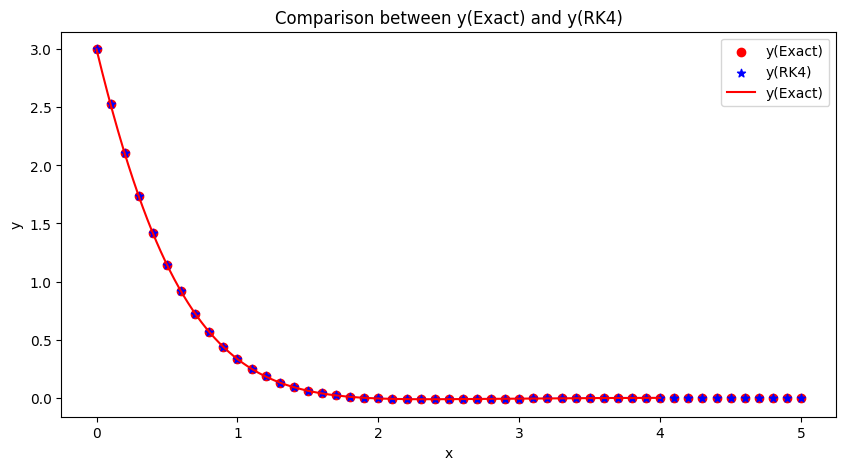

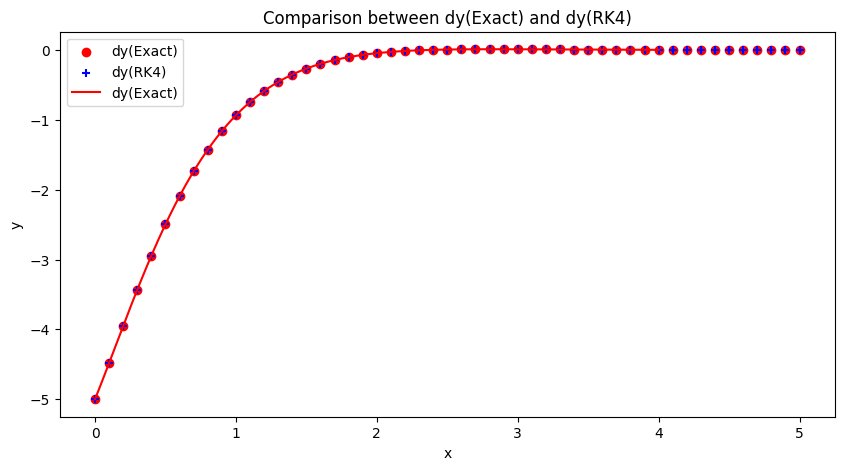

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c="red",marker="o",label="y(Exact)")
plt.scatter(x,u1,c="blue",marker="*",label="y(RK4)")
tempr=np.linspace(0,4,1000)
plt.plot(tempr,[function(i) for i in tempr],c="red",label="y(Exact)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between y(Exact) and y(RK4)')
plt.legend()

plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x,y_b,c="red",marker="o",label="dy(Exact)")
plt.scatter(x,u2,c="blue",marker="+",label="dy(RK4)")

tempr=np.linspace(0,4,1000)

plt.plot(tempr,[function_derivative(i) for i in tempr],c="red",label="dy(Exact)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between dy(Exact) and dy(RK4)')
plt.legend()

plt.show()